In [10]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [19]:
# 确认初始位置以及角色行走时单位
src = cv2.imread("maze.jpg")
cv2.namedWindow("maze", cv2.WINDOW_AUTOSIZE)
cv2.imshow("maze", src)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
low_hsv = np.array([26,43,46]) # 黄色的范围下界
high_hsv = np.array([34,255,255]) # 黄色的范围上界
mask = cv2.inRange(hsv,lowerb=low_hsv,upperb=high_hsv)
cv2.imshow("start",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(np.where(mask!=0))

start_position_x = np.array(np.where(mask!=0))[:,:-1][0] # 根据图片知有个初始位置外点被错分，所以要去除最后一个元素
start_position_y = np.array(np.where(mask!=0))[:,:-1][1]
start_position = np.array([np.unique(start_position_x),np.unique(start_position_y)
[1:]]) # 由于y轴有墙壁被算进所以要去点第一个
print(start_position)
block_size = len(np.unique(start_position[0]))

(array([400, 400, 400, 400, 400, 400, 401, 401, 401, 401, 401, 401, 401,
       401, 401, 402, 402, 402, 402, 402, 403, 403, 403, 403, 403, 403,
       403, 403, 403, 404, 404, 404, 404, 404, 405, 405, 405, 405, 405,
       406, 406, 406, 406, 406, 406, 407, 407, 407, 407, 407, 410],
      dtype=int64), array([555, 556, 557, 558, 559, 560, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 554, 555, 557, 558, 560, 553, 554, 555, 556, 557, 558,
       559, 560, 561, 554, 555, 557, 558, 560, 554, 555, 556, 559, 560,
       555, 556, 557, 558, 559, 560, 556, 557, 558, 559, 560, 553],
      dtype=int64))
[[400 401 402 403 404 405 406 407]
 [554 555 556 557 558 559 560 561]]


In [12]:
# 载入迷宫图片
maze_img = cv2.imread('maze.jpg')

gray_img = cv2.cvtColor(maze_img, cv2.COLOR_BGR2GRAY) # 转换成灰度图
_, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY_INV) # 二值化处理

In [13]:
# 确认迷宫左上角的坐标
print((np.where(binary_img == 0)[0][0], np.where(binary_img == 0)[1][0]))

(48, 50)


In [14]:
start_position

array([[400, 401, 402, 403, 404, 405, 406, 407],
       [554, 555, 556, 557, 558, 559, 560, 561]], dtype=int64)

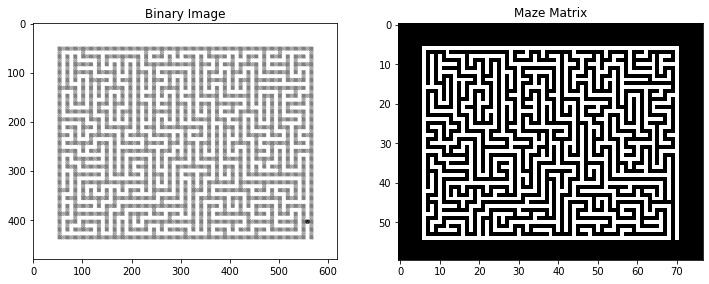

In [15]:
# 根据之前得到的行走单位将迷宫分块处理
block_size = len(start_position[0]) # 每个矩阵块长度
maze_matrix = np.zeros((gray_img.shape[0] // block_size, gray_img.shape[1] // block_size), dtype=np.uint8)

for i in range(0, gray_img.shape[0], block_size):
    for j in range(2, gray_img.shape[1], block_size): # 根据迷宫左上角坐标知应该将y坐标平移2个像素再做
        if i == start_position[0][0] and j == start_position[1][0]:
            maze_matrix[i // block_size, j // block_size] = 0
            start = i // block_size, j // block_size
            continue
        # elif i == start_position[0][0]+32 and j == start_position[1][0]: # 封住迷宫口
        #     maze_matrix[i // block_size, j // block_size] = 1
        #     continue

        block = binary_img[i:i+block_size, j:j+block_size]
        
        # 如果区域中存在白色区域代表是墙壁
        if 0 in block:
            maze_matrix[i // block_size, j // block_size] = 1

# Visualize the binary image and the resulting matrix for confirmation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(binary_img, cmap='gray')
ax[0].set_title('Binary Image')
ax[1].imshow(maze_matrix, cmap='gray')
ax[1].set_title('Maze Matrix')
plt.show()

In [9]:
# 储存信息
pd.DataFrame(maze_matrix).to_csv('maze_matrix_open.csv', header=None, index=None) # 储存迷宫矩阵
info = {'block_size': [block_size], 
        'start_x' : [start[0]],
        'start_y': [start[1]]}
pd.DataFrame(info).to_csv('info.csv', index=None) # 储存迷宫矩阵

In [22]:
clicks = []
def click_event(event, x, y, flags, param):
    # 如果发生了左键点击
    if event == cv2.EVENT_LBUTTONDOWN:
        clicks.append((x, y))
        cv2.circle(maze, (x, y), 3, (0, 255, 0), -1)  # 在点击位置画一个小圆圈
        cv2.imshow("maze", maze)
        cv2.waitKey(1000)

maze = cv2.imread('maze.jpg')
cv2.imshow('maze', maze)

cv2.setMouseCallback('maze', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [41]:
time.time()

1705130440.3751452